In [ ]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import cv2
from IPython.display import Image, display
import pickle

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory, to_categorical
from tensorflow.keras.regularizers import l2
from keras.applications import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ls /content/drive/MyDrive/Capstone/Train/

 Capstone			       'Project 5.gdoc'
 Classroom			       'Project 5 Presentation.gslides'
 College			       'Screen Shot 2021-06-29 at 9.06.14 AM.png'
'Lightning Talk for Capstone.gslides'  'Screen Shot 2021-06-29 at 9.11.34 AM.png'
'MSMP Spring Semester'		       'Stuff need.gsheet'
'MY DOCS'


In [ ]:
train_image_path = '/content/drive/MyDrive/Capstone/Train/'
val_image_path = '/content/drive/MyDrive/Capstone/Val/'

In [ ]:
def load_images(img_path):
  imgs = []
  labels = []
  classes = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

  for c in range(len(classes)):
    dir = os.path.join(img_path, classes[c], 'images')

    for n in os.listdir(dir):
      path = os.path.join(dir, n)
      img = cv2.imread(path)
      img = cv2.resize(img, (256, 256))

      imgs.append(img)
      labels.append(c)
  return np.array(imgs), np.array(labels)

In [ ]:
(X_train, y_train) = load_images(train_image_path)
(X_test, y_test) = load_images(val_image_path)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model 1 - MaxPooling and Dropout

In [ ]:
model1 = keras.models.Sequential([
    Conv2D(32, 5, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2),
    Dropout(0.2),
    Conv2D(64, 5, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      30,482,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,536,772 (116.49 MB)

 Trainable params: 30,536,772 (116.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history1 = model1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size = 64,
    epochs=20
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 234ms/step - acc: 0.4622 - loss: 2.7362 - val_acc: 0.7070 - val_loss: 0.7925
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - acc: 0.7832 - loss: 0.5535 - val_acc: 0.7988 - val_loss: 0.5162
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - acc: 0.8894 - loss: 0.3108 - val_acc: 0.8809 - val_loss: 0.4118
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - acc: 0.9482 - loss: 0.1464 - val_acc: 0.8730 - val_loss: 0.4278
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - acc: 0.9599 - loss: 0.0962 - val_acc: 0.9160 - val_loss: 0.3730
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - acc: 0.9764 - loss: 0.0801 - val_acc: 0.9121 - val_loss: 0.4263
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - acc: 0.9871 - loss: 0.0419 - val_acc: 0.9141 - val_loss: 0.4344
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - acc: 0.9830 - loss: 0.0474 - val_acc: 0.9121 - val_loss: 0.4020
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/

In [ ]:
model1.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - acc: 0.9145 - loss: 0.4510


[0.4158717691898346, 0.927734375]

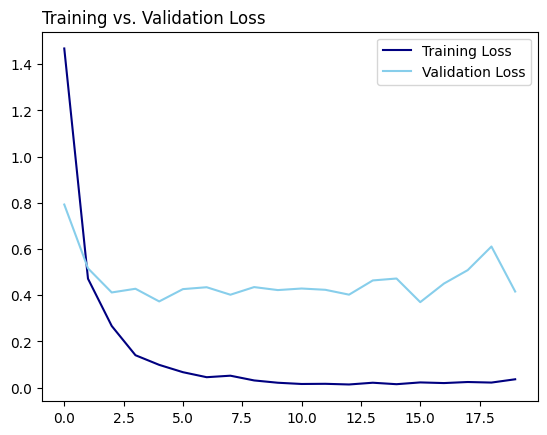

In [ ]:
plt.plot(history1.history['loss'], label = 'Training Loss', color='navy')
plt.plot(history1.history['val_loss'], label = 'Validation Loss', color = 'skyblue')
plt.legend()
plt.title('Training vs. Validation Loss', loc='left');
plt.savefig('/content/drive/MyDrive/Capstone/images/model1loss.png', dpi=192)

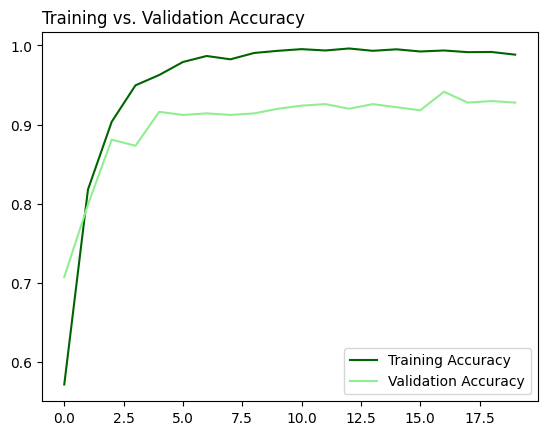

In [ ]:
plt.plot(history1.history['acc'], label='Training Accuracy', color='darkgreen')
plt.plot(history1.history['val_acc'], label='Validation Accuracy', color='lightgreen')
plt.legend()
plt.title('Training vs. Validation Accuracy', loc='left');
plt.savefig('/content/drive/MyDrive/Capstone/images/model1acc.png', dpi=192)

In [ ]:
y_pred = model1.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_new = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_new, y_pred)
pd.DataFrame(cm, columns = ['Pred Glioma', 'Pred Meningioma', 'Pred No Tumor', 'Pred Pituitary'], index = ['Actual Glioma', 'Actual Meningioma', 'Actual No Tumor', 'Actual Pituitary'])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


,Pred Glioma,Pred Meningioma,Pred No Tumor,Pred Pituitary
Actual Glioma,122,14,0,0
Actual Meningioma,6,133,1,0
Actual No Tumor,5,5,88,2
Actual Pituitary,2,1,1,132


In [ ]:
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
report = classification_report(y_test_new, y_pred, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Glioma       0.90      0.90      0.90       136
  Meningioma       0.87      0.95      0.91       140
    No Tumor       0.98      0.88      0.93       100
   Pituitary       0.99      0.97      0.98       136

    accuracy                           0.93       512
   macro avg       0.93      0.92      0.93       512
weighted avg       0.93      0.93      0.93       512



# Model 2 - Transfer Learning (Xception)

In [ ]:
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
base_model = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x)
model2 = keras.Model(inputs=base_model.input, outputs=predictions)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [ ]:
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 127, 127, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 127, 127, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 127, 127, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 125, 125, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 125, 125, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 125, 125, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 125, 125, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 125, 125, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 125, 125, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 125, 125, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 125, 125, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 63, 63, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 63, 63, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 22,963,756 (87.60 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
for layer in base_model.layers:
    print(layer.name)

input_layer_1
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d_2
block2_pool
batch_normalization
add
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_3
block3_pool
batch_normalization_1
add_1
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_4
block4_pool
batch_normalization_2
add_2
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_3
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_4
block7_sepconv1_act
block7_sepconv1
block7_sepconv1_bn
block7_sepconv2_act
block7_sepconv2
block7_s

In [ ]:
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=20
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 69s 482ms/step - acc: 0.6268 - loss: 1.0338 - val_acc: 0.8594 - val_loss: 0.3865
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 387ms/step - acc: 0.8778 - loss: 0.3168 - val_acc: 0.7988 - val_loss: 0.4328
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 391ms/step - acc: 0.8921 - loss: 0.2919 - val_acc: 0.9082 - val_loss: 0.2256
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 391ms/step - acc: 0.9426 - loss: 0.1708 - val_acc: 0.9160 - val_loss: 0.2339
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 389ms/step - acc: 0.9500 - loss: 0.1370 - val_acc: 0.8965 - val_loss: 0.2795
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 387ms/step - acc: 0.9465 - loss: 0.1536 - val_acc: 0.9316 - val_loss: 0.2226
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 390ms/step - acc: 0.9708 - loss: 0.0904 - val_acc: 0.9082 - val_loss: 0.2649
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 390ms/step - acc: 0.9768 - loss: 0.0738 - val_acc: 0.9355 - val_loss: 0.1912
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 388ms/

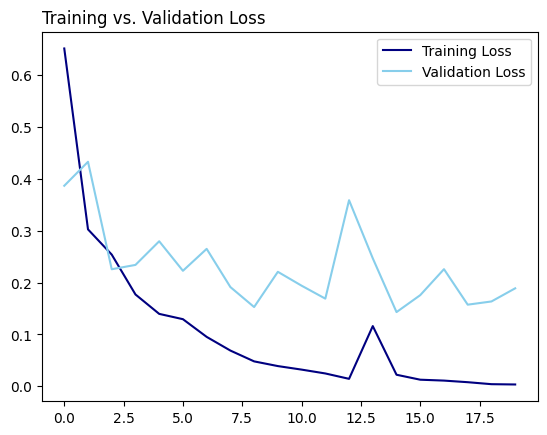

In [ ]:
plt.plot(history2.history['loss'], label = 'Training Loss', color='navy')
plt.plot(history2.history['val_loss'], label = 'Validation Loss', color = 'skyblue')
plt.legend()
plt.title('Training vs. Validation Loss', loc='left');
plt.savefig('/content/drive/MyDrive/Capstone/images/model2loss.png', dpi=192)

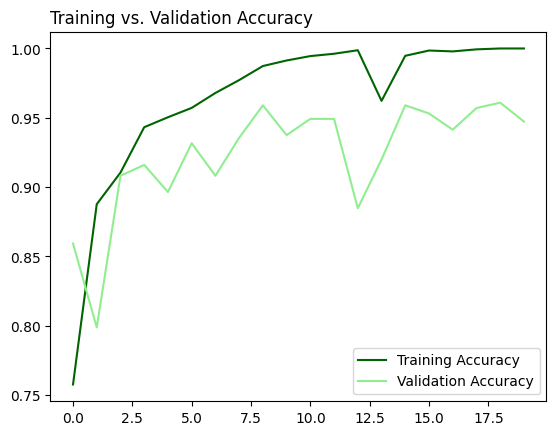

In [ ]:
plt.plot(history2.history['acc'], label = 'Training Accuracy', color='darkgreen')
plt.plot(history2.history['val_acc'], label = 'Validation Accuracy', color = 'lightgreen')
plt.legend()
plt.title('Training vs. Validation Accuracy', loc='left');
plt.savefig('/content/drive/MyDrive/Capstone/images/model2acc.png', dpi=192)

In [ ]:
y_pred2 = model2.predict(X_test)
y_pred2 = np.argmax(y_pred2, axis = 1)
y_test_new = np.argmax(y_test, axis=1)
cm2 = confusion_matrix(y_test_new, y_pred2)
pd.DataFrame(cm2, columns = ['Pred Glioma', 'Pred Meningioma', 'Pred No Tumor', 'Pred Pituitary'], index = ['Actual Glioma', 'Actual Meningioma', 'Actual No Tumor', 'Actual Pituitary'])

16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step


,Pred Glioma,Pred Meningioma,Pred No Tumor,Pred Pituitary
Actual Glioma,122,13,0,1
Actual Meningioma,2,136,0,2
Actual No Tumor,0,5,95,0
Actual Pituitary,0,4,0,132


In [ ]:
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
report = classification_report(y_test_new, y_pred2, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Glioma       0.98      0.90      0.94       136
  Meningioma       0.86      0.97      0.91       140
    No Tumor       1.00      0.95      0.97       100
   Pituitary       0.98      0.97      0.97       136

    accuracy                           0.95       512
   macro avg       0.96      0.95      0.95       512
weighted avg       0.95      0.95      0.95       512



In [ ]:
with open('/content/drive/MyDrive/Capstone/tumor-detector.pkl', 'wb') as f:
  pickle.dump(model2, f)

# Model 3 - l2 Regularization and Dropout

In [ ]:
model3 = keras.models.Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(256, 256, 3), kernel_regularizer = l2(0.001)),
    MaxPooling2D(2),
    Dropout(0.2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 122, 122, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      30,482,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,536,772 (116.49 MB)

 Trainable params: 30,536,772 (116.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=20
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - acc: 0.4647 - loss: 1.6435 - val_acc: 0.7500 - val_loss: 0.7195
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - acc: 0.8146 - loss: 0.4896 - val_acc: 0.8477 - val_loss: 0.4152
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - acc: 0.8818 - loss: 0.3180 - val_acc: 0.7988 - val_loss: 0.6155
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - acc: 0.8909 - loss: 0.2712 - val_acc: 0.8965 - val_loss: 0.3358
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - acc: 0.9602 - loss: 0.1166 - val_acc: 0.8945 - val_loss: 0.4035
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - acc: 0.9703 - loss: 0.0920 - val_acc: 0.9004 - val_loss: 0.3687
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - acc: 0.9776 - loss: 0.0657 - val_acc: 0.9219 - val_loss: 0.3277
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - acc: 0.9865 - loss: 0.0483 - val_acc: 0.9160 - val_loss: 0.3584
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - acc: 0.98

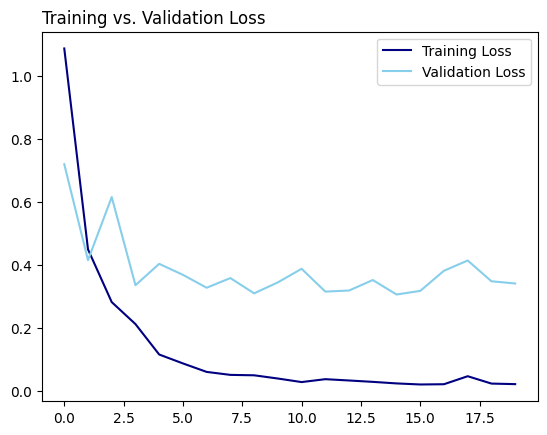

In [ ]:
plt.plot(history3.history['loss'], label = 'Training Loss', color='navy')
plt.plot(history3.history['val_loss'], label = 'Validation Loss', color = 'skyblue')
plt.legend()
plt.title('Training vs. Validation Loss', loc='left');
plt.savefig('/content/drive/MyDrive/Capstone/images/model3loss.png', dpi=192)

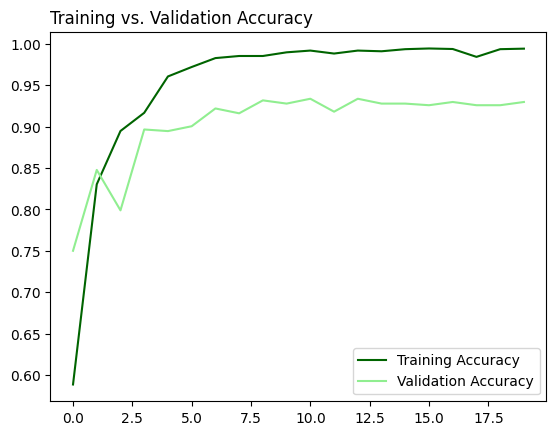

In [ ]:
plt.plot(history3.history['acc'], label = 'Training Accuracy', color='darkgreen')
plt.plot(history3.history['val_acc'], label = 'Validation Accuracy', color = 'lightgreen')
plt.legend()
plt.title('Training vs. Validation Accuracy', loc='left');
plt.savefig('/content/drive/MyDrive/Capstone/images/model3acc.png', dpi=192)

In [ ]:
y_pred3 = model3.predict(X_test)
y_pred3 = np.argmax(y_pred3, axis = 1)
y_test_new = np.argmax(y_test, axis=1)
cm3 = confusion_matrix(y_test_new, y_pred3)
pd.DataFrame(cm3, columns = ['Pred Glioma', 'Pred Meningioma', 'Pred No Tumor', 'Pred Pituitary'], index = ['Actual Glioma', 'Actual Meningioma', 'Actual No Tumor', 'Actual Pituitary'])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


,Pred Glioma,Pred Meningioma,Pred No Tumor,Pred Pituitary
Actual Glioma,127,9,0,0
Actual Meningioma,9,129,2,0
Actual No Tumor,3,9,86,2
Actual Pituitary,1,1,0,134


In [ ]:
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
report = classification_report(y_test_new, y_pred3, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Glioma       0.91      0.93      0.92       136
  Meningioma       0.87      0.92      0.90       140
    No Tumor       0.98      0.86      0.91       100
   Pituitary       0.99      0.99      0.99       136

    accuracy                           0.93       512
   macro avg       0.94      0.93      0.93       512
weighted avg       0.93      0.93      0.93       512



# Grad-Cam Set Up

In [ ]:
img_size=(256, 256)
layer_name = 'block14_sepconv2_bn'
img_path = '/content/drive/MyDrive/Capstone/Val/Glioma/images/Tr-gl_1283.jpg'
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

In [ ]:
# Code structure for all grad-CAM cells are taken and adapted from https://keras.io/examples/vision/grad_cam/
def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tensorflow.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tensorflow.GradientTape() as tape:
        conv_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tensorflow.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, conv_output)
    pooled_grads = tensorflow.reduce_mean(grads, axis=(0, 1, 2))

    conv_output = conv_output[0]
    heatmap = conv_output @ pooled_grads[..., tensorflow.newaxis]
    heatmap = tensorflow.squeeze(heatmap)
    heatmap = tensorflow.maximum(heatmap, 0) / tensorflow.math.reduce_max(heatmap)

    return heatmap.numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Meningioma with confidence 3.18


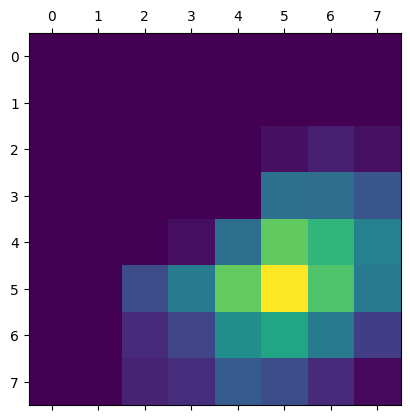

<Figure size 640x480 with 0 Axes>

In [ ]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))

model = model2

preds = model.predict(img_array)
predicted_class = np.argmax(preds[0])
confidence = preds[0][predicted_class]
print(f'Predicted class: {class_names[predicted_class]} with confidence {confidence:.2f}')


heatmap = make_gradcam_heatmap(img_array, model, layer_name)

plt.matshow(heatmap)
plt.show()

In [ ]:
type(preds)

numpy.ndarray

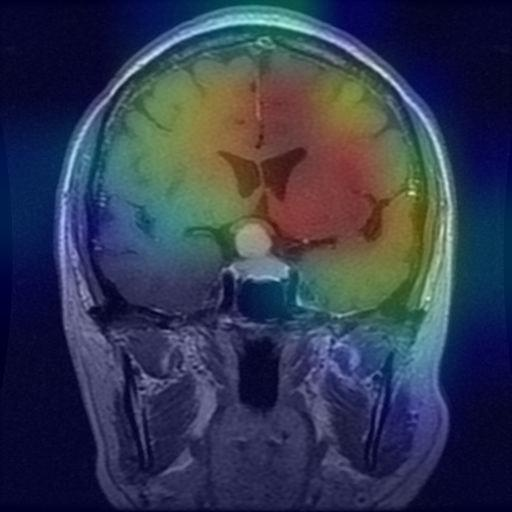

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)